<a href="https://colab.research.google.com/github/YashrajMishra6190/ColabNotebooks/blob/main/360_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
-----
`Data Preprocessing` which includes dealing with Missing values, find out duplicate and remove duplicated data values, type casting and finally treating outliers.

So this whole documnetation is for the data preprocessing.

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the data set
df = pd.read_csv(r'/content/Medical Inventory Optimaization Dataset.csv')
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6-1-2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


Initially in the raw dataset we had 14218 rows and 14 columns.

In [ ]:
df.shape

(14218, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


# Typecasting
----
Here it was mention from the above inforamtion there is the `Dateofbill` is in String or  object format.

So, let,s change the above code schema for the `Dateofbill` in the date and time format.  

In [ ]:
df['Dateofbill']= pd.to_datetime(df['Dateofbill'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     14218 non-null  object        
 1   Patient_ID      14218 non-null  int64         
 2   Specialisation  14218 non-null  object        
 3   Dept            14218 non-null  object        
 4   Dateofbill      14218 non-null  datetime64[ns]
 5   Quantity        14218 non-null  int64         
 6   ReturnQuantity  14218 non-null  int64         
 7   Final_Cost      14218 non-null  float64       
 8   Final_Sales     14218 non-null  float64       
 9   RtnMRP          14218 non-null  float64       
 10  Formulation     13565 non-null  object        
 11  DrugName        12550 non-null  object        
 12  SubCat          12550 non-null  object        
 13  SubCat1         12526 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)


## Specifying the format for the date

In [ ]:
df['Dateofbill'] = df['Dateofbill'].dt.strftime('%Y/%m/%d')

In [ ]:
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022/06/01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022/07/23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022/06/23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022/03/17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022/12/21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [ ]:
df.tail()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
14213,Sale,12018099994,Specialisation39,Department1,2022/06/19,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2022/02/24,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,2022/06/27,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,2022/07/30,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES
14217,Sale,12018116820,Specialisation26,Department1,2022/10/24,3,0,46.182,133.800,0.0,Form1,TRAMADOL,INJECTIONS,CENTRAL NERVOUS SYSTEM


# Handling missing values

In [ ]:
df.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

# Handling Missing Values

`Formulation, DrugName, SubCat, SubCat1` column having missing value.

As we had include all the categories column, most used data is entered NaN space.

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
#Checking if there is any another missing values
df.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

# Handling Duplicates

In [ ]:
df.duplicated().sum()

26

In [ ]:
#removing all the duplicates rows

df.drop_duplicates()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022/06/01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022/07/23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022/06/23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022/03/17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022/12/21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,2022/06/19,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2022/02/24,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,2022/06/27,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,2022/07/30,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


In [ ]:
#Checking if there is still the duplicates values leftover

df.duplicated().sum()

26

In [ ]:
df

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022/06/01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022/07/23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022/06/23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022/03/17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022/12/21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,2022/06/19,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2022/02/24,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,2022/06/27,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,2022/07/30,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


After removing the dupliates: 14192 rows and 14 columns

# Outliers Treatment

-----
Removing the outliers using Zscore -> Capping

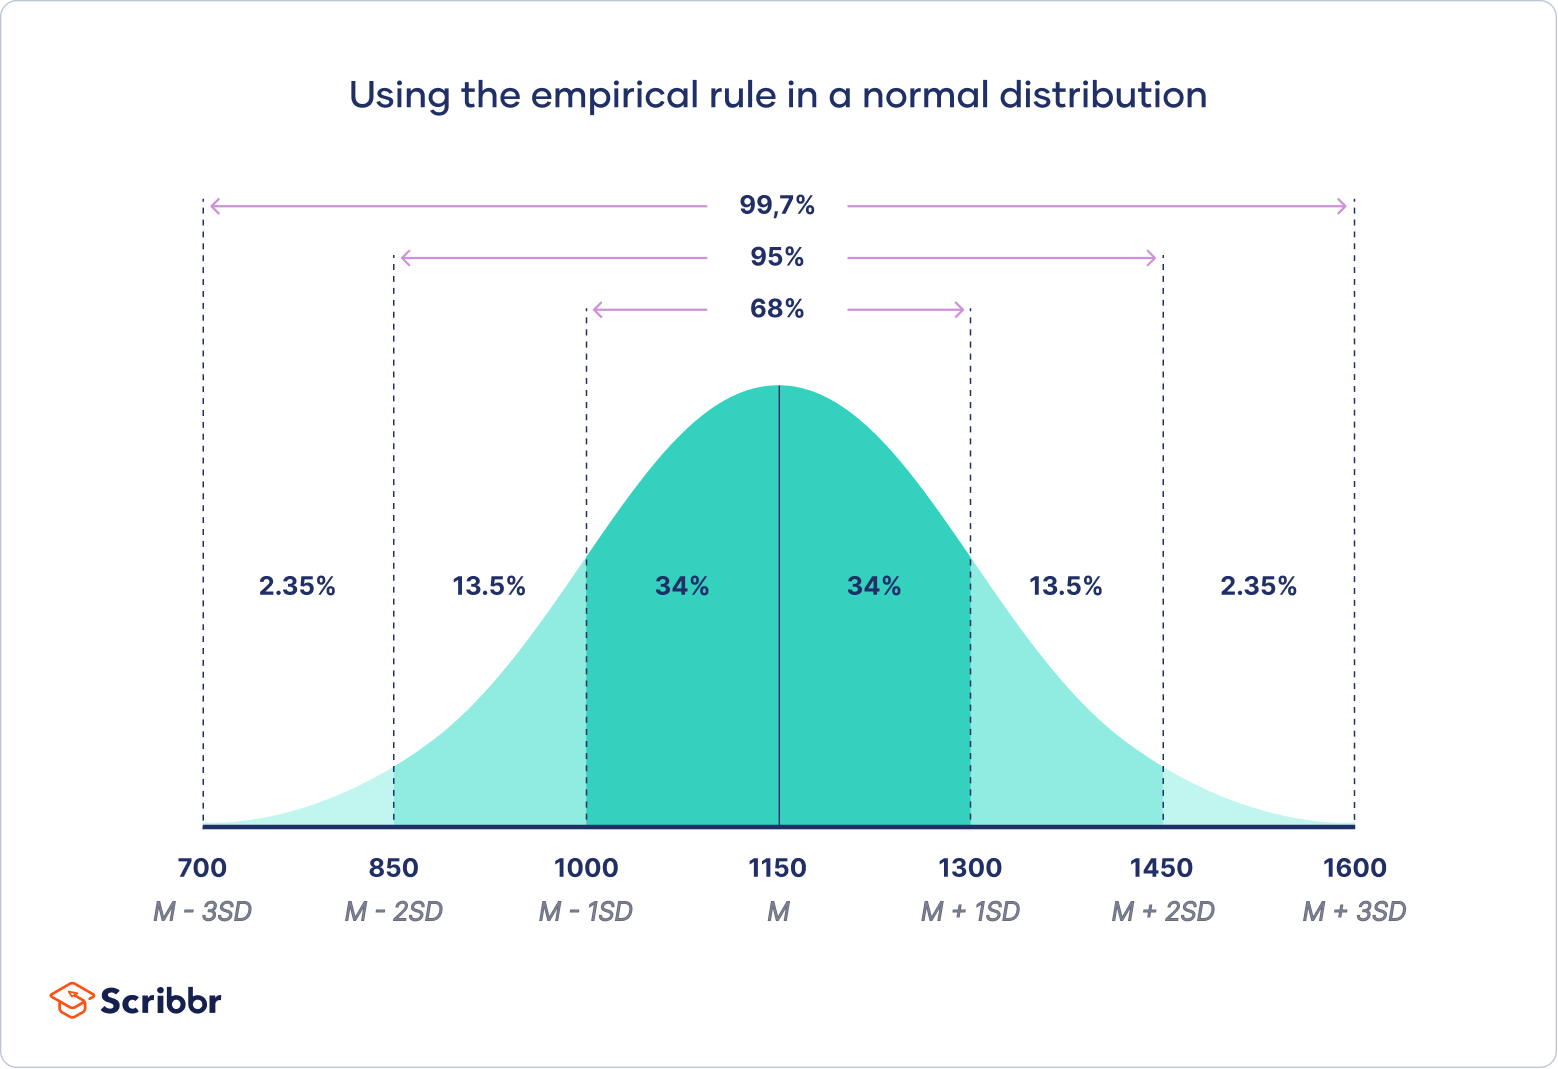

In [ ]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
Patient_ID,1.000000,-0.001893,0.003441,-0.000736,-0.006702,-0.001467
Quantity,-0.001893,1.000000,-0.077264,0.017126,0.359877,-0.069499
ReturnQuantity,0.003441,-0.077264,1.000000,-0.004076,-0.061947,0.509355
Final_Cost,-0.000736,0.017126,-0.004076,1.000000,0.865818,0.152988
Final_Sales,-0.006702,0.359877,-0.061947,0.865818,1.000000,-0.055721
RtnMRP,-0.001467,-0.069499,0.509355,0.152988,-0.055721,1.000000


<ipython-input-18-217a695cbf04>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])
<ipython-input-18-217a695cbf04>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ReturnQuantity'])
<ipython-input-18-217a695cbf04>:9: UserWarning: 

`distplot` is a deprecated function and will b

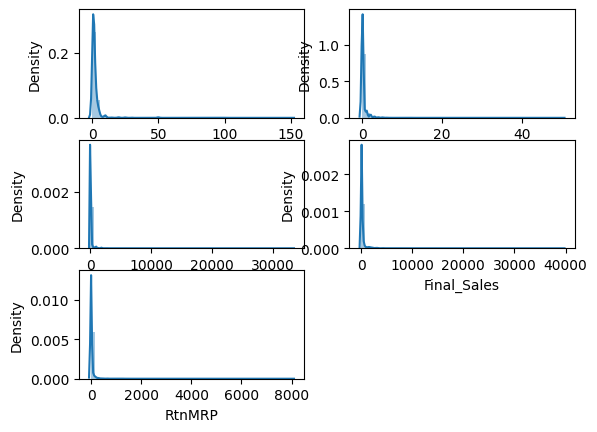

In [ ]:
#Outlier graphs
plt.subplot(3,2,1)
sns.distplot(df['Quantity'])

plt.subplot(3,2,2)
sns.distplot(df['ReturnQuantity'])

plt.subplot(3,2,3)
sns.distplot(df['Final_Cost'])

plt.subplot(3,2,4)
sns.distplot(df['Final_Sales'])

plt.subplot(3,2,5)
sns.distplot(df['RtnMRP'])

plt.show()

- Now removing the outliers from each column with numerical correleation columns

In [ ]:
# Removing the outliers from the Quantity

mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()

upper_limit_quantity = mean_quantity + 3 * std_quantity
lower_limit_quantity = mean_quantity - 3 * std_quantity

df['Quantity'] = np.where(df['Quantity'] > upper_limit_quantity, upper_limit_quantity, np.where(df['Quantity'] < lower_limit_quantity, lower_limit_quantity,df['Quantity']))

In [ ]:
# Removing the outliers from the ReturnQuantity

mean_rtquantity = df['ReturnQuantity'].mean()
std_rtquantity = df['ReturnQuantity'].std()

upper_limit_rtquantity = mean_rtquantity + 3 * std_rtquantity
lower_limit_rtquantity = mean_rtquantity - 3 * std_rtquantity

df['ReturnQuantity'] = np.where(df['ReturnQuantity'] > upper_limit_rtquantity, upper_limit_rtquantity, np.where(df['ReturnQuantity'] < lower_limit_rtquantity, lower_limit_rtquantity,df['ReturnQuantity']))

In [ ]:
# Removing the outliers from the Final_Cost

mean_fc = df['Final_Cost'].mean()
std_fc = df['Final_Cost'].std()

upper_limit_fc = mean_fc + 3 * std_fc
lower_limit_fc = mean_fc - 3 * std_fc

df['Final_Cost'] = np.where(df['Final_Cost'] > upper_limit_fc, upper_limit_fc, np.where(df['Final_Cost'] < lower_limit_fc, lower_limit_fc, df['Final_Cost']))

In [ ]:
# Removing the outliers from the Final_Sales

mean_fs = df['Final_Sales'].mean()
std_fs = df['Final_Sales'].std()

upper_limit_fs = mean_fs + 3 * std_fs
lower_limit_fs = mean_fs - 3 * std_fs

df['Final_Sales'] = np.where(df['Final_Sales'] > upper_limit_fs, upper_limit_fs, np.where(df['Final_Sales'] < lower_limit_fs, lower_limit_fs, df['Final_Sales']))

In [ ]:
# Removing the outliers from the Return MRP

mean_rtnmrp = df['RtnMRP'].mean()
std_rtnmrp = df['RtnMRP'].std()

upper_limit_rtnmrp = mean_rtnmrp + 3 * std_rtnmrp
lower_limit_rtnmrp= mean_rtnmrp - 3 * std_rtnmrp

df['RtnMRP'] = np.where(df['RtnMRP'] > upper_limit_rtnmrp, upper_limit_rtnmrp, np.where(df['RtnMRP'] < lower_limit_rtnmrp, lower_limit_rtnmrp, df['RtnMRP']))

In [ ]:
df.shape

(14218, 14)

<ipython-input-25-a724c9bef3a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])
<ipython-input-25-a724c9bef3a2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ReturnQuantity'])
<ipython-input-25-a724c9bef3a2>:9: UserWarning: 

`distplot` is a deprecated function and will b

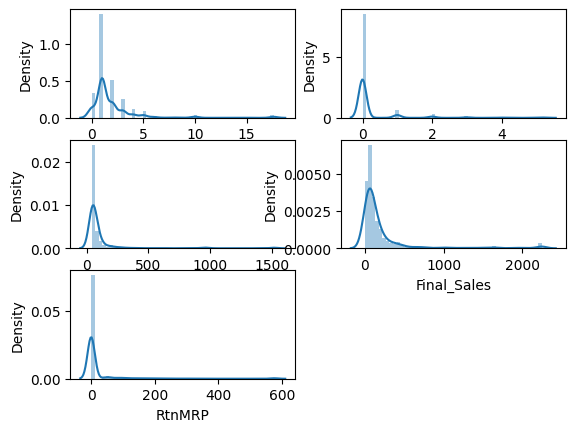

In [ ]:
#Outlier graphs
plt.subplot(3,2,1)
sns.distplot(df['Quantity'])

plt.subplot(3,2,2)
sns.distplot(df['ReturnQuantity'])

plt.subplot(3,2,3)
sns.distplot(df['Final_Cost'])

plt.subplot(3,2,4)
sns.distplot(df['Final_Sales'])

plt.subplot(3,2,5)
sns.distplot(df['RtnMRP'])

plt.show()

#As we known that there is no outliers present in the DataSet: Numerical Coorelation

# Result:
-------
After preprocessing there is no erroroneous data present.


----
After the data preprocessing from the datast we will find out Four Business Momement:

# First Business Moment
`Measure of central tendency`

In [ ]:
data1 = {
    'column_name' : ['Qunatity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP'],
    'mean_column' : [df['Quantity'].mean(), df['ReturnQuantity'].mean(), df['Final_Cost'].mean(), df['Final_Sales'].mean(), df['RtnMRP'].mean()],
    'median_column' : [df['Quantity'].median(), df['ReturnQuantity'].median(), df['Final_Cost'].median(), df['Final_Sales'].median(), df['RtnMRP'].median()],
    'mode_column' : [df['Quantity'].mode(), df['ReturnQuantity'].mode(), df['Final_Cost'].mode(), df['Final_Sales'].mode(), df['RtnMRP'].mode()]
}

In [ ]:
first_moment = pd.DataFrame(data1)
first_moment

,column_name,mean_column,median_column,mode_column
0,Qunatity,1.965468,1.000,"0 1.0 Name: Quantity, dtype: float64"
1,ReturnQuantity,0.226339,0.000,"0 0.0 Name: ReturnQuantity, dtype: float64"
2,Final_Cost,109.583980,53.650,"0 49.352 Name: Final_Cost, dtype: float64"
3,Final_Sales,209.962891,86.424,"0 0.0 Name: Final_Sales, dtype: float64"
4,RtnMRP,20.045612,0.000,"0 0.0 Name: RtnMRP, dtype: float64"


# Second Business Decision Moment:
`Measure of Frequency`: Skewness, Standard Frequency, Range

In [ ]:
#range = MAX-MIN

range_q = max(df['Quantity']) - min(df['Quantity'])
range_rq = max(df['ReturnQuantity']) - min(df['ReturnQuantity'])
range_fc = max(df['Final_Cost']) - min(df['Final_Cost'])
range_fs = max(df['Final_Sales']) - min(df['Final_Sales'])
range_rmrp = max(df['RtnMRP']) - min(df['RtnMRP'])

In [ ]:
data2 = {
    'column_name' : ['Qunatity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP'],
    'variance_column' : [df['Quantity'].var(), df['ReturnQuantity'].var(), df['Final_Cost'].var(), df['Final_Sales'].var(), df['RtnMRP'].var()],
    'standard_deviation' : [df['Quantity'].std(), df['ReturnQuantity'].std(), df['Final_Cost'].std(), df['Final_Sales'].std(), df['RtnMRP'].std()],
    'range_column' : [range_q, range_rq, range_fc, range_fs, range_rmrp]
}

In [ ]:
second_moment = pd.DataFrame(data2)
second_moment

,column_name,variance_column,standard_deviation,range_column
0,Qunatity,6.342304,2.518393,17.627877
1,ReturnQuantity,0.576642,0.759370,5.221919
2,Final_Cost,42251.381696,205.551409,1479.172338
3,Final_Sales,155041.005872,393.752468,2247.823016
4,RtnMRP,5974.729370,77.296374,575.913761


# Third Business Moment Decision
---
`Skewness`

In [ ]:

data3 = {
    'column_name' : ['Qunatity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP'],
    'skewness_column' : [df['Quantity'].skew(), df['ReturnQuantity'].skew(), df['Final_Cost'].skew(), df['Final_Sales'].skew(), df['RtnMRP'].skew()]
}

In [ ]:
third_moment = pd.DataFrame(data3)
third_moment

,column_name,skewness_column
0,Qunatity,3.972680
1,ReturnQuantity,4.338619
2,Final_Cost,5.135762
3,Final_Sales,3.780983
4,RtnMRP,5.357895


# Fourth Business Moment Decision
----
`Kurtosis`

In [ ]:
data4 = {
    'column_name' : ['Qunatity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP'],
    'kurtosis_column' : [df['Quantity'].kurt(), df['ReturnQuantity'].kurt(), df['Final_Cost'].kurt(), df['Final_Sales'].kurt(), df['RtnMRP'].kurt()]
}

In [ ]:
fourth_moment = pd.DataFrame(data4)
fourth_moment

,column_name,kurtosis_column
0,Qunatity,19.486529
1,ReturnQuantity,20.956709
2,Final_Cost,27.969516
3,Final_Sales,14.681091
4,RtnMRP,31.620050


`Before Preprocessing the four business Moment`

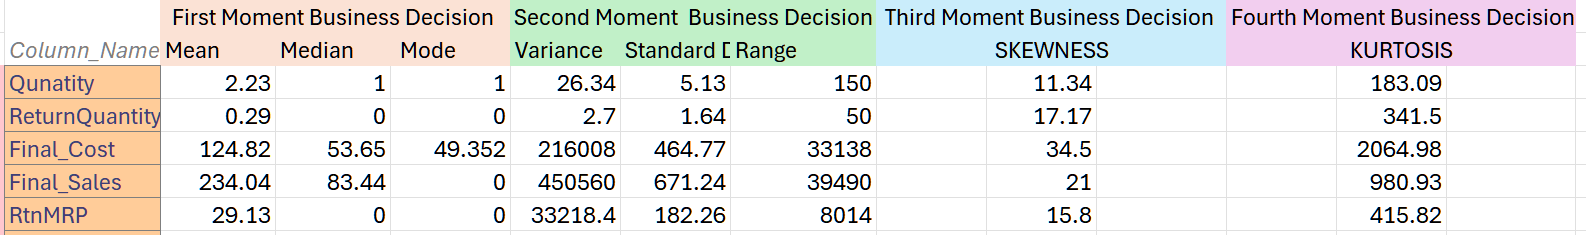

- After preprocessing dataset; we handles the all the missing values, removes duplicates and removes unnecssary outliers(noise).

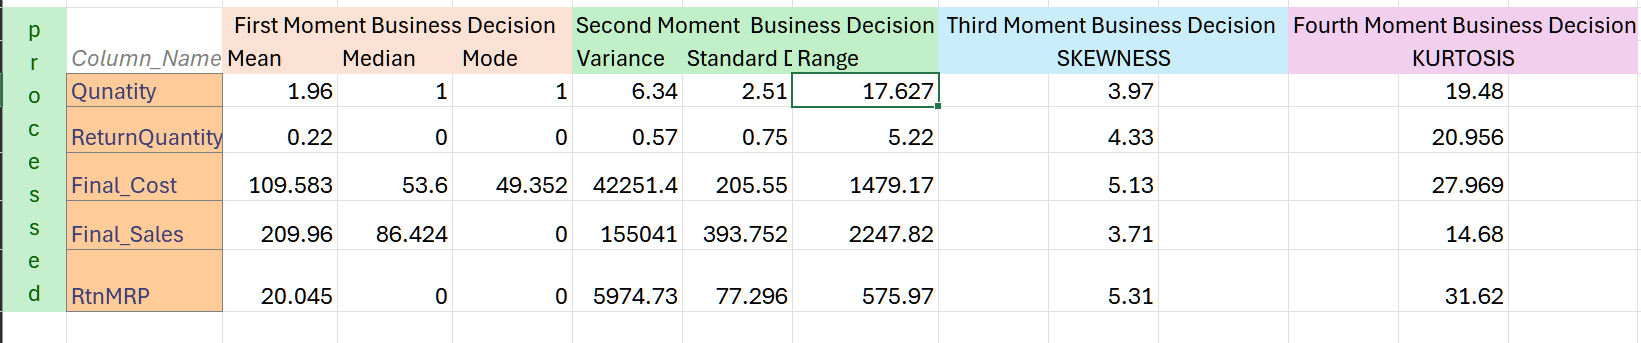